In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from timefusion import TimeFusion
import random
import torch


In [2]:
# Create dataset of two correlated, random walks on top of sine functions
# Set random seed to make result reproducible
np.random.seed(0)

# Random walk starts at 0,0
z = np.array([0,0])

# Covariance matrix for normal distribution
cov = [
    [1, 0.5],
    [0.5, 1]
]

# List to hold samples
samples = []

for i in range(10000):

    # Calculate underlying sine values
    y = 30*np.array([np.sin(0.04*i),np.sin((0.06*i + 1))])

    # Draw random samples from normal distribution
    #z = np.random.multivariate_normal(z,cov)
    z = np.array([0,0])

    # Store samples
    samples.append(y + z)

# Create pandas DataFrame out of data
data = pd.DataFrame(data=samples,columns=["sine1","sine2"])

# Remove 50% of samples to make into an irregular time-series
keep = 1 # What fraction of cells to keep
mask = [False]*int(2*len(data)*keep) + [True]*int(2*len(data)*(1-keep))
random.shuffle(mask)
mask = np.array(mask).reshape((len(data),2))
data = data.mask(mask)

# Remove all rows without any data
data = data.dropna(axis = 0, how = 'all')


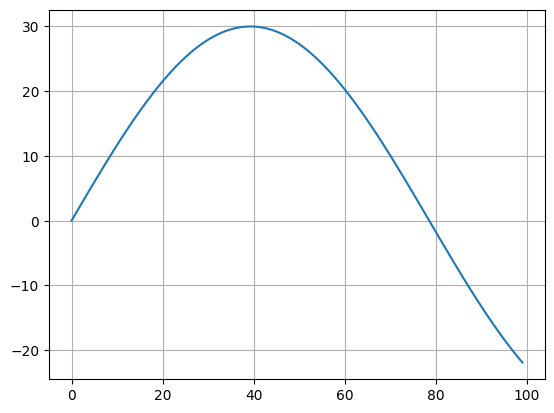

In [3]:
# Plot data so we can inspect it
data["sine1"][:100].plot()
plt.grid(True)

In [4]:
predictor = TimeFusion(
    datapoint_dim = 5,
    context_length = 1,
    prediction_length = 1,
    indices = [1,2,3,4],
    timestamps = [],
    device = torch.device("mps"),
    diff_steps=10,
    dim_feedforward=32,
    num_decoder_layers= 3,
    num_encoder_layers=3
)

In [5]:
predictor.train(
    data=data,
    epochs=10,
    num_batches_per_epoch=32
)

 |==============================|  Batch: 32 / 32, Epoch: 1 / 10, Average Loss: 288.754 

In [ ]:
print("Number of trainable parameters:",sum(p.numel() for p in predictor.parameters()))

Number of trainable parameters: 86785
